In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
s = open("sunspots.txt", "r")
s_raw = s.readlines()
s.close()

In [28]:
sunspots = []
for term in (s_raw):
    s_term = term.split()
    f_term = [float(s_term[0]), float(s_term[1])]
    sunspots.append(f_term)
sunspots = np.array(sunspots)

Text(0.5, 1.0, 'Number of Sunspots vs. Time')

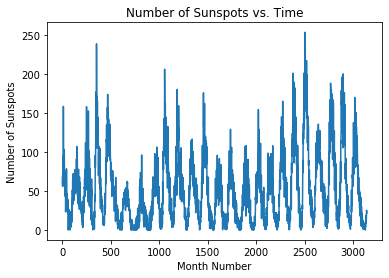

In [31]:
plt.plot(sunspots[:,0], sunspots[:,1])
plt.xlabel("Month Number")
plt.ylabel("Number of Sunspots")
plt.title("Number of Sunspots vs. Time")

# Estimate of period: Looks like around 130 months, obtained by looking at the total number of peaks between 0 and 3000 months, and dividing 3000 by this number.

In [32]:
#part b:

import numpy as np

def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex) # we only need the first 1/2 of the points
    for k in range(N//2+1): # let's do loops, pedagogy > speed today
        for n in range(N): # trapezoidal integration with y0=yend
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c


In [35]:
c = dft(sunspots[:,1]) # compute the Fourier coefficients

Text(0, 0.5, '$|c_k|^2$')

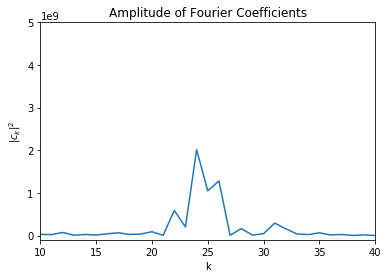

In [85]:
plt.plot(abs(c)**2) # by Parceval's rule, this propto sqrt(Energy in each mode)
plt.title('Amplitude of Fourier Coefficients')
plt.xlim(10, 40)
plt.ylim(-.01e10,.5e10)
plt.xlabel("k")
plt.ylabel(r"$|c_k|^2$")



# the approximate peak seems to be k=24. Using L=3134 (total number of months), we get that the period is T = L/k so T = 130.9 approximately. This is close to the period estimated.

# Ex 7.4:

In [94]:
dow = open("dow.txt", "r")
dow_raw = dow.readlines() #get data from txt file
dow.close()

In [98]:
dow_c = [] #this list will hold closing price of the dow
for term in (dow_raw): #convert raw data to floats
    dow_c.append(float(term.split()[0]))
dow_c = np.array(dow_c)

Text(0, 0.5, 'Price ($)')

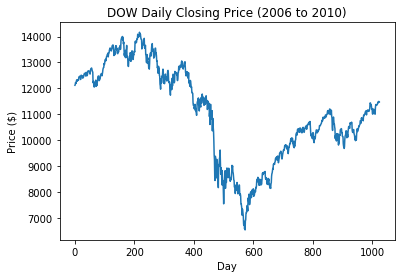

In [101]:
plt.plot(dow_c)
plt.title("DOW Daily Closing Price (2006 to 2010)")
plt.xlabel("Day")
plt.ylabel("Price ($)")

In [112]:
#b
c = np.fft.rfft(dow_c) #get coefficients of discrete Fourier transform

In [121]:
#c
cap = 9* len(c) //10 #gets number of coefficients that are set to 0
trim_c = c + 0 #make a copy of the coefficient list
trim_c[-cap:] = 0 #set them to 0

In [123]:
#d
i_dow_c = np.fft.irfft(trim_c)

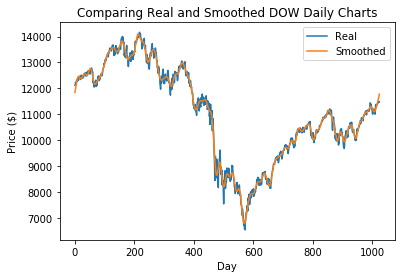

In [125]:
plt.plot(dow_c, label="Real")
plt.plot(i_dow_c, label="Smoothed")
plt.title("Comparing Real and Smoothed DOW Daily Charts")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()

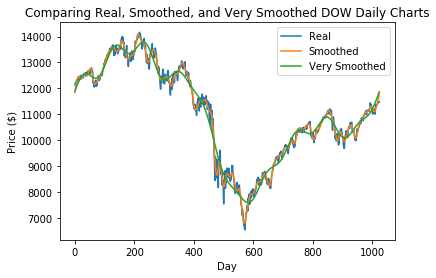

In [126]:
#e
cap = 98* len(c) //100 #now make 98% of coefficients 0
trim_c = c + 0 #make a copy of the coefficient list
trim_c[-cap:] = 0 #set them to 0

i_dow_c2 = np.fft.irfft(trim_c)

plt.plot(dow_c, label="Real")
plt.plot(i_dow_c, label="Smoothed")
plt.plot(i_dow_c2, label="Very Smoothed")
plt.title("Comparing Real, Smoothed, and Very Smoothed DOW Daily Charts")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()

# Ex 7.6:

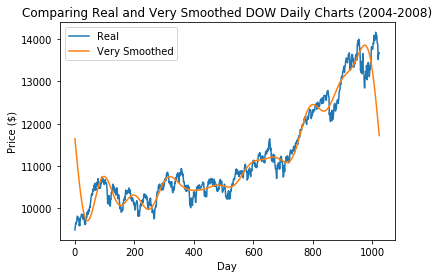

In [128]:
dow = open("dow2.txt", "r")
dow_raw = dow.readlines() #get data from txt file
dow.close()

dow_c = [] #this list will hold closing price of the dow
for term in (dow_raw): #convert raw data to floats
    dow_c.append(float(term.split()[0]))
dow_c = np.array(dow_c)

c = np.fft.rfft(dow_c)
cap = 98* len(c) //100 #now make 98% of coefficients 0
trim_c = c + 0 #make a copy of the coefficient list
trim_c[-cap:] = 0 #set them to 0

i_dow_c2 = np.fft.irfft(trim_c)

plt.plot(dow_c, label="Real")
plt.plot(i_dow_c2, label="Very Smoothed")
plt.title("Comparing Real and Very Smoothed DOW Daily Charts (2004-2008)")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()

In [134]:
######################################################################
#
# Functions to perform fast discrete cosine and sine transforms and
# their inverses in one and two dimensions.  These functions work by
# wrapping the DFT function from numpy, rather than explicitly
# performing the cosine and sine transforms themselves.  The sine
# transforms take arrays whose first element is zero and return arrays
# whose first element is also zero.  This differs from some other
# implementations, which drop the first element, since it is always
# zero.
#
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dct2(y): 2D DCT of 2D real array y
#   idct2(a): 2D inverse DCT real array a
#   dst(y): Type-I discrete sine transform (DST) of real data y
#   idst(a): Type-I inverse DST of a
#   dst2(y): 2D DST of 2D real array y
#   idst2(a): 2D inverse DST real array a
#
# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely
#
######################################################################


from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft


######################################################################
# 1D DCT Type-II

def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])


######################################################################
# 1D inverse DCT Type-II

def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]


######################################################################
# 2D DCT

def dct2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b


######################################################################
# 2D inverse DCT

def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y


######################################################################
# 1D DST Type-I

def dst(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y


######################################################################
# 2D DST

def dst2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dst(y[i,:])
    for j in range(N):
        b[:,j] = dst(a[:,j])

    return b


######################################################################
# 2D inverse DST

def idst2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idst(b[i,:])
    for j in range(N):
        y[:,j] = idst(a[:,j])

    return y

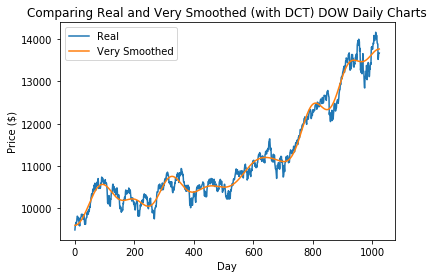

In [135]:
c2 = dct(dow_c)
cap = 98* len(c2) //100 #now make 98% of coefficients 0
trim_c2 = c2 + 0 #make a copy of the coefficient list
trim_c2[-cap:] = 0 #set them to 0

i_dow_c22 = idct(trim_c2)

plt.plot(dow_c, label="Real")
plt.plot(i_dow_c22, label="Very Smoothed")
plt.title("Comparing Real and Very Smoothed (with DCT) DOW Daily Charts")
plt.xlabel("Day")
plt.ylabel("Price ($)")
plt.legend()

# Eq 7.3

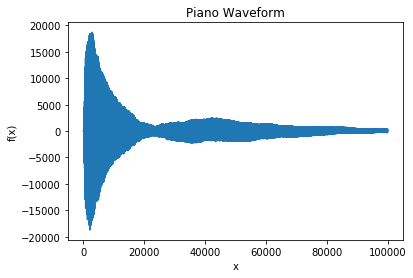

In [166]:
name = "piano"
filename = name+".txt"
i = open(filename, "r")
i_raw = i.readlines() #get data from txt file
i.close()

wave = [] #this list will hold closing price of the dow
for term in (i_raw): #convert raw data to floats
    wave.append(float(term.split()[0]))
wave = np.array(wave)

plt.plot(wave)
plt.title("Piano Waveform")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("piano_waveform.pdf")

Text(0, 0.5, '$|c_k|$')

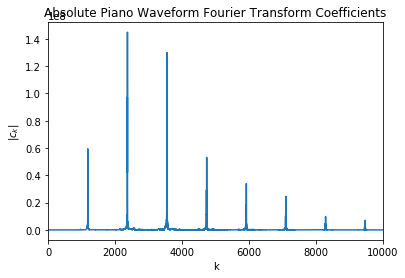

In [150]:
c = np.fft.rfft(wave)
plt.plot(abs(c))
plt.xlim(0,10000)
plt.title("Absolute Piano Waveform Fourier Transform Coefficients")
plt.xlabel("k")
plt.ylabel(r"$|c_k|$")

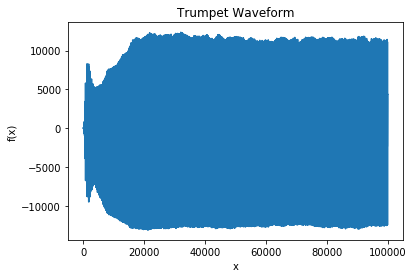

In [168]:
name = "trumpet"
filename = name+".txt"
i = open(filename, "r")
i_raw = i.readlines() #get data from txt file
i.close()

wave = [] #this list will hold closing price of the dow
for term in (i_raw): #convert raw data to floats
    wave.append(float(term.split()[0]))
wave = np.array(wave)

plt.plot(wave)
plt.title("Trumpet Waveform")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("trumpet_waveform.pdf")

Text(0, 0.5, '$|c_k|$')

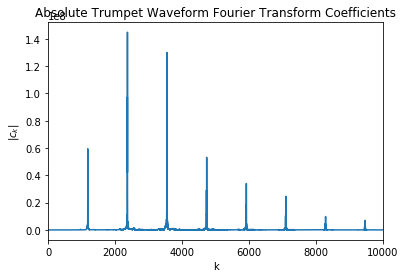

In [151]:
c = np.fft.rfft(wave)
plt.plot(abs(c))
plt.xlim(0,10000)
plt.title("Absolute Trumpet Waveform Fourier Transform Coefficients")
plt.xlabel("k")
plt.ylabel(r"$|c_k|$")

In [167]:
len(wave)

100000

Text(0, 0.5, '$|c_k|$')

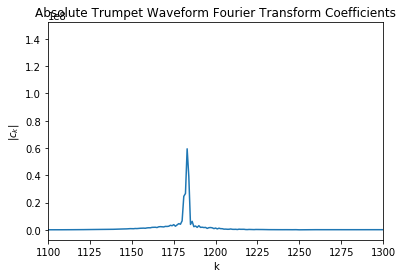

In [165]:
c = np.fft.rfft(wave)
plt.plot(abs(c))
plt.xlim(1100,1300)
plt.title("Absolute Trumpet Waveform Fourier Transform Coefficients")
plt.xlabel("k")
plt.ylabel(r"$|c_k|$")

# The first peak for both coefficient plots is at around k=1190. The range of time for the waveform is 100000/44100 = 2.61. Then, the frequency is k/dt = 1190/2.61 = 527Hz, which is very similar to the frequency of treble C (523 Hz), one octave higher than middle C. Therefore, the musicians are playing treble C.